Complete each problem below and print to pdf. Submit the pdf.

You will need to work with the three datasets attached to this assignment:

*   poverty.csv
*   poverty_2.csv
*   real_estate.csv

# Problem 1: Univariate Linear Regression

## 1) import the libraries you will need:
numpy 
pandas
matplotlab.pyplot
statsmodels.api

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


## 2) Import the date poverty.csv dataset 

In [393]:
data = pd.read_csv("poverty.csv")

## 3) Print the dataset indexed upon the location column.

In [394]:
data[["Location"]]

,Location
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,District_of_Columbia
9,Florida


## 4) Get useful descriptive statistial data on the dataset.
Hint: this is a single line, data._____ 

In [352]:
data.describe()

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,13.117647,22.282353,72.019608,7.854902,42.243137
std,4.277228,8.043499,18.975563,8.914131,12.318511
min,5.300000,8.100000,39.000000,0.900000,20.000000
25%,10.250000,17.250000,58.300000,3.900000,33.900000
50%,12.200000,20.000000,69.400000,6.300000,39.500000
75%,15.800000,28.100000,87.950000,9.450000,52.600000
max,25.300000,44.800000,104.300000,65.000000,69.100000


##5) Print the columns

In [353]:
print(data.columns)

Index(['Location', 'PovPct', 'Brth15to17', 'Brth18to19', 'ViolCrime',
       'TeenBrth'],
      dtype='object')


## 6) Create a regression line based upon the dependent and independent variables:
PovPct 
Brth18to19

In this step only create a scatterplot of the two variables, simply plotting the data.

Note: The variable PovPct is the percent of a state’s population in 2000 living in households with incomes below the federally defined poverty level. 

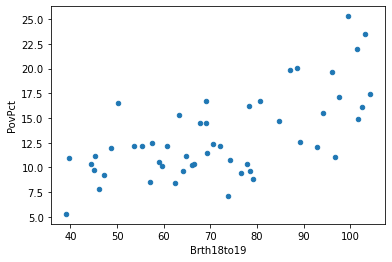

In [354]:
data.plot(kind='scatter',x='Brth18to19',y='PovPct')

## 7) Lets create a new variable, x1, as well as the results variable:
Example would be
1.   x1 = sm.add_constant(x)
2.   results = sm.OLS(y, x1).fit()
3.   results.summary()

This gives you the OLS Regression results, the coefficients table, and some additional tests. The data that you are interested in is the coefficient values. This is the value for the constant you created is b0, and birth19to19 is b1 in the regression equation.


In [355]:
x = data["Brth18to19"]
y = data["PovPct"]
x1 =  sm.add_constant(x)
results = sm.OLS(y, x1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 PovPct   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     35.78
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           2.50e-07
Time:                        20:25:38   Log-Likelihood:                -132.00
No. Observations:                  51   AIC:                             268.0
Df Residuals:                      49   BIC:                             271.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5712      1.822      1.411      0.1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## 8) Taking the coeffient values for the new constant and the Y variable, create a scatterplot:

e.g. 
yhat = 0.1464*x + 0.25712
fig = plt.plot(x, yhat, lw=4, c='red', label = 'regression line')

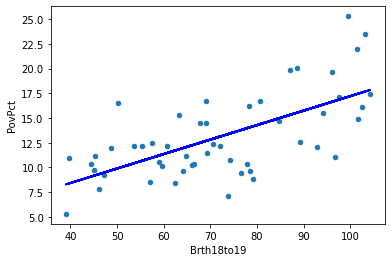

In [356]:
yhat = 0.1464*x + 2.5712
# 2.5712 (this is our theta_0)
# 0.1464 (this is our theta_1)

data.plot(kind='scatter',x='Brth18to19',y='PovPct')
fig = plt.plot(x, yhat, linewidth=2, c='blue', label='regression line')


# Problem 2: Implement code from lecture

## 1) Perform linear regression using the normal equation, as done in slides.

Predicted solution using the normal equation:  [2.57123525 0.14643806]


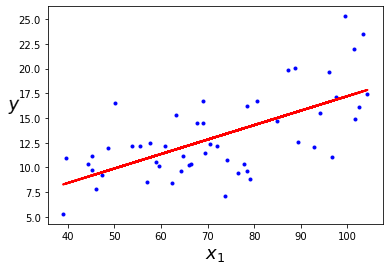

In [357]:
# Lecture February 8th 2022 for reference

# Plotting our data...
X = data["Brth18to19"]
y = data["PovPct"]
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=2, fontsize=18)


X_b = np.c_[np.ones((51,1)), X] # Adding artificial features (we have 51 data points so add 51 1's)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # The normal equation

# Draw the regression line from theta_best
fig = plt.plot(x, theta_best[1]*x + theta_best[0], linewidth=2, c='red', label='regression line')

print("Predicted solution using the normal equation: ", theta_best) 



## 2) Perform linear regression using Scikit-Learn, as done in the slides.

In [358]:
from sklearn.linear_model import LinearRegression
X = data["Brth18to19"]
y = data["PovPct"]

lin_reg =  LinearRegression() # instantiate LinearRegression
lin_reg.fit(X_b, y) # X_b from earlier where we added the artificial features
print(lin_reg.intercept_, lin_reg.coef_[1]) # theta_0 is always the intercept, theta_1 is the coefficient


2.571235250308659 0.14643806213837704


# Problem 3: Multivariate Linear Regression
In this problem we will continue using the poverty dataset. Do poverty and violent crimes affect teen pregnancy?

In [ ]:
# Lecture February 15rd 2022 @ 

## 1) import the libraries you will need:
numpy 
pandas
matplotlab.pyplot
statsmodels.api

In [359]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize


## 2) Import the dataset, poverty_2.csv, and print it.


In [361]:
data = pd.read_csv("poverty_2.csv")

## 3) We need to normalize the input variables.

In [362]:
data = normalize(data, axis=0)

## 4) Split the data into input variables, X, and the output variable, Y

In [363]:
X = data[:,0:2]
Y= data[:,2:]



## 5) Graph the dataset with a seed of 42.
Replace the FILLINTHESEVALUES fields.

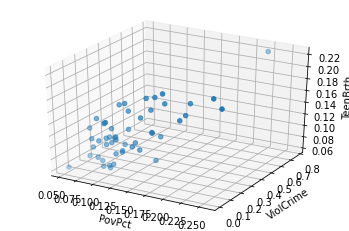

In [364]:
np.random.seed(42)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = data[:,0:1]
ys = data[:,1:2]
zs = data[:,2:3]
ax.scatter(xs, ys, zs)

ax.set_xlabel('PovPct')
ax.set_ylabel('ViolCrime')
ax.set_zlabel('TeenBrth')

plt.show()

## 6) Implement  Gradient Descent.
This section has be provided. Please run and understand the code.

In [365]:
# hyperparameters
learning_rate = 0.05
max_iteration = 500

#parameters
theta = np.zeros((data.shape[1], 1))

In [366]:
def hypothesis (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

In [367]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

In [368]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - hypothesis(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

In [369]:
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    d_theta = gradient (theta, X, Y)
    theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

In [370]:
# Training model
theta, cost = gradient_descent (theta, X, Y, learning_rate, max_iteration, 100)

iteration :  0  loss :  0.008893757788504215
iteration :  100  loss :  0.0006811106575134702
iteration :  200  loss :  0.0006573219302696655
iteration :  300  loss :  0.0006360731168287809
iteration :  400  loss :  0.0006169026951758099


In [371]:
#optimal value is :
theta

array([[0.12381477],
       [0.04264512],
       [0.05698502]])

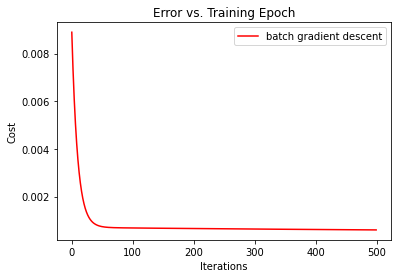

In [372]:
#plot cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.legend(loc='upper right', labels=['batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()

## 7) Implement Stochastic Gradient Descent. Please run.

In [373]:
def stochastic_gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(X.shape[0]):
      d_theta = gradient (theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

In [374]:
theta_stoc = np.zeros((data.shape[1], 1))

In [375]:
theta_stoc, cost_stoc = stochastic_gradient_descent (theta_stoc, X, Y, learning_rate, max_iteration, 100)

iteration :  0  loss :  0.0007764556902156442
iteration :  100  loss :  0.0004037848207345314
iteration :  200  loss :  0.00036553095210465356
iteration :  300  loss :  0.000347847758744226
iteration :  400  loss :  0.00033956148785195


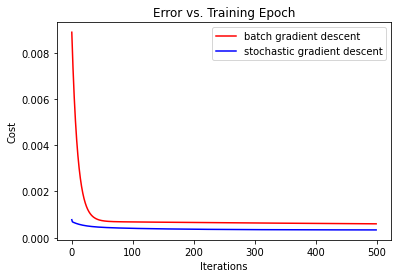

In [376]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.plot(np.arange(max_iteration), cost_stoc, 'b')  
#ax.plot(np.arange(max_iteration), mb_cost, 'g')  
ax.legend(loc='upper right', labels=['batch gradient descent', 'stochastic gradient descent'])#, 'mini-batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()

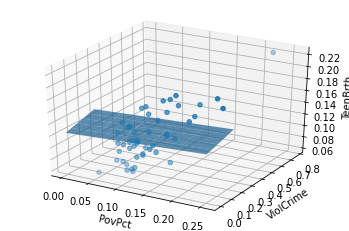

In [377]:
np.random.seed(42)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('PovPct')
ax.set_ylabel('ViolCrime')
ax.set_zlabel('TeenBrth')

# new 
x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.7)

plt.show()

# Problem 4, predict house price.

* import real_estate.csv 
* Are there any null values in the dataset? Drop any missing data if exist. 
* Create X as a 1-D array of the distance to the nearest MRT station, and y as the housing price
* What is the number of samples in the data set? To do this, you can look at the "shape" of X and y
* Split the data into train and test sets using sklearn's train_test_split, with test_size = 1/3
* Find the line of best fit using a Linear Regression and show the result of coefficients and intercept (you can use sklearn's linear regression)
* Using the predict method, make predictions for the test set and evaluate the performance (e.g., MSE or other metrics).

In [378]:
data_estate = pd.read_csv("real_estate.csv")

In [379]:
data_estate.isnull().any()

No                                        False
X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool

In [380]:
X = data_estate["X3 distance to the nearest MRT station"]
y = data_estate["Y house price of unit area"]
print("Number of samples: ", X.shape[0])

Number of samples:  414


In [381]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

Text(0, 0.5, 'House Price')

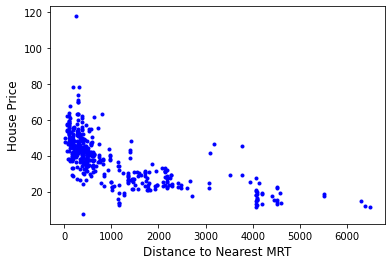

In [382]:
plt.plot(X, y, "b.")
plt.xlabel("Distance to Nearest MRT", fontsize=12)
plt.ylabel("House Price", rotation=90, fontsize=12)

In [383]:
X_train_b = np.c_[np.ones((276,1)), X_train] # Adding artificial features
lin_reg =  LinearRegression() # instantiate LinearRegression
lin_reg.fit(X_train_b, y_train) # X_b from earlier where we added the artificial features
print(lin_reg.intercept_, lin_reg.coef_[1]) # theta_0 is always the intercept, theta_1 is the coefficient

46.68201580875155 -0.007648428745582546


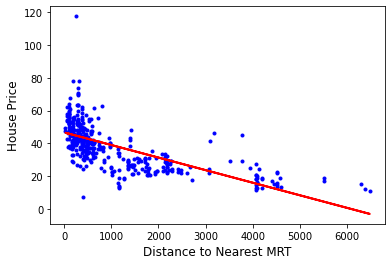

In [384]:
plt.plot(X, y, "b.")
plt.xlabel("Distance to Nearest MRT", fontsize=12)
plt.ylabel("House Price", rotation=90, fontsize=12)
fig = plt.plot(X, lin_reg.coef_[1]*X + lin_reg.intercept_, linewidth=2, c='red', label='regression line')

In [385]:
from sklearn.metrics import mean_squared_error
X_test_b = np.c_[np.ones((138,1)), X_test] # Adding artificial features
y_pred = lin_reg.predict(X_test_b)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mean_squared_error(y_test, y_pred,squared=False)

9.56664968149907